In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
from datetime import datetime
import time
import winsound


In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#zips two arrays into a tuple object
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #checks if the city isn't already on the list
    if city not in cities:
        cities.append(city)

len(cities)
        

625

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
line = ("-"*25)
print(line)

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print(line)
print("Data Retrieval Complete      ")
print(line)

duration = 1000 #milliseconds
freq = 400 #hz
winsound.Beep(freq, duration)

Beginning Data Retrieval     
-------------------------
Processing Record 1 of Set 1 | srednekolymsk
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | puerto carreno
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | guarapari
Processing Record 9 of Set 1 | brae
Processing Record 10 of Set 1 | verkhoyansk
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | san cristobal
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | axim
Processing Record 15 of Set 1 | antofagasta
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | tres coracoes
Processing Record 23 of Set 1 | ma

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Srednekolymsk,67.4500,153.6833,53.89,43,92,6.51,RU,2022-07-20 02:06:01
1,Atuona,-9.8000,-139.0333,77.68,72,36,11.83,PF,2022-07-20 02:06:01
2,Port Alfred,-33.5906,26.8910,56.17,96,100,5.01,ZA,2022-07-20 02:06:01
3,Vaini,-21.2000,-175.2000,74.57,80,13,22.86,TO,2022-07-20 02:02:05
4,Puerto Carreno,6.1890,-67.4859,72.63,93,100,3.69,CO,2022-07-20 02:06:02
5,New Norfolk,-42.7826,147.0587,47.91,55,4,1.14,AU,2022-07-20 02:06:02
6,Saskylakh,71.9167,114.0833,43.86,61,100,15.35,RU,2022-07-20 02:06:02
7,Guarapari,-20.6667,-40.4975,69.89,92,2,6.24,BR,2022-07-20 02:06:03
8,Brae,60.3964,-1.3530,55.63,91,100,11.18,GB,2022-07-20 02:06:03
9,Verkhoyansk,67.5447,133.3850,47.05,72,100,8.95,RU,2022-07-20 02:06:03


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

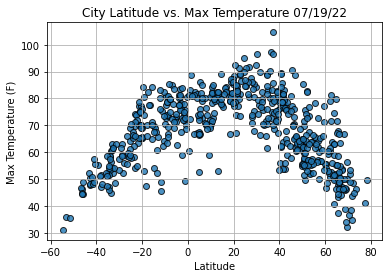

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")


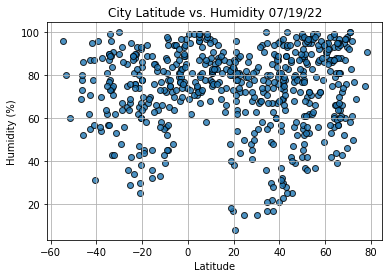

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")

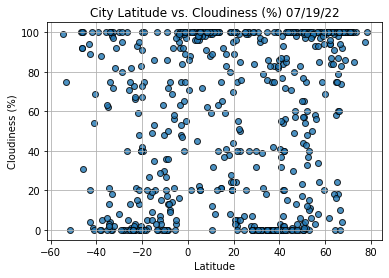

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")

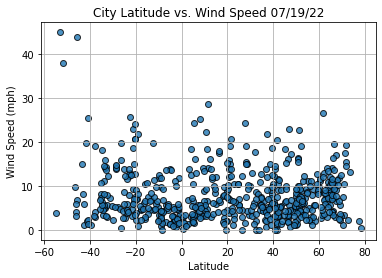

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")